22.279310344827586


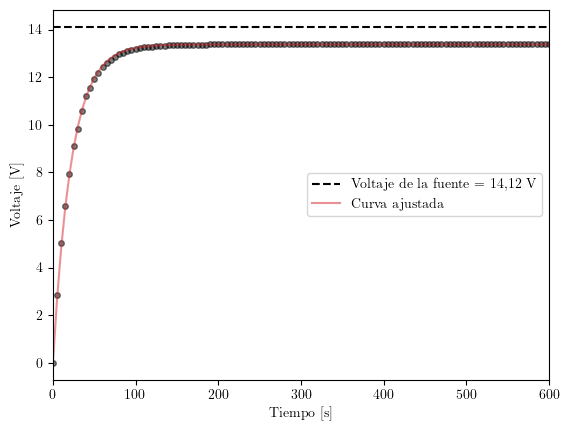

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['text.usetex'] = True

# Generaciond de datos

df1 = pd.read_excel(r"F:\Facultad\Laboratorios\EyM\Lab2\datos.xlsx", sheet_name="datos",
                    usecols="B", skiprows=range(2), nrows=121, header=None)

tiempoCarga = np.arange(0, 605, 5)
voltajeCarga = df1.to_numpy().flatten().transpose()

voltajeFuente = 14.12
v_tau = voltajeCarga[-1] * 0.632  # %63,2 de carga de la fuente
interp = np.interp(8.4688, voltajeCarga, tiempoCarga)


# Ajuste exponencial
def func(x, a, b):
    return 13.38 * (1 - np.exp(-b * x))


fit = sp.optimize.curve_fit(func, tiempoCarga, voltajeCarga) # Coeficientes


# Graficacion

fix, ax = plt.subplots()

# Utilizar fuente de Latex
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

ax.hlines(voltajeFuente, 0, 600, colors="black", ls="--", label="Voltaje de la fuente = 14,12 V")
ax.plot(tiempoCarga, voltajeCarga, "o", color="black", markersize=4, alpha=0.5)
ax.plot(tiempoCarga, func(tiempoCarga,fit[0][0],fit[0][1]), '-', color="tab:red", markersize=4, alpha=0.5,label="Curva ajustada")
plt.xlim(0, 600)

ax.legend(loc="center right")
ax.set_xlabel("Tiempo [s]")
ax.set_ylabel("Voltaje [V]")

plt.show()
